In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.17f}'.format

In [16]:
tsv_path = "data/combined_results.tsv"
source_types = [
    "frame_count",
    "token_count"
]
source_types += [f"{n}gram" for n in [1,2,3,4,5]]

In [17]:
result_tsv = pd.read_csv(tsv_path, delimiter='\t')

In [18]:
approx_res = {
    'type': [],
    'slope': [],
    'fitness': [],
}

In [19]:
for type in source_types:
    approx_res['type'].append(type)
    slope, *_ = np.linalg.lstsq(
        result_tsv[type].to_numpy()[:, None],
        result_tsv["word_count"],
        rcond=None
    )
    slope = float(slope)
    approx_res["slope"].append(slope)
    approx = slope * result_tsv[type]
    approx_res["fitness"].append(
        ((approx - result_tsv["word_count"]) ** 2).mean()
    )

/tmp/ipykernel_25045/1521461559.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope = float(slope)


In [20]:
approx_res_df = pd.DataFrame(approx_res)
approx_res_df

,type,slope,fitness
0,frame_count,0.14459676676001779,30.31635476346921720
1,token_count,0.63883549047577470,8.62661197492157683
2,1gram,0.27204111081987054,14.26929619534138105
3,2gram,0.41653349335194240,15.95602246699064430
4,3gram,0.55931762146830921,18.37329538882963575
5,4gram,0.66807979886211111,18.36182371507278077
6,5gram,0.72752527645337173,20.39951591386180496


In [21]:
def plot_approx(type : str):
    plt.scatter(result_tsv[type], result_tsv["word_count"], s=1)
    plt.plot(
        [0, 100 / approx_res["slope"][source_types.index(type)]],
        [0, 100],
        # approx_res["slope"][source_types.index(type)] * result_tsv[type],
        color='r',
    )
    plt.xlabel(type)
    plt.ylabel('word_count')
    plt.show()

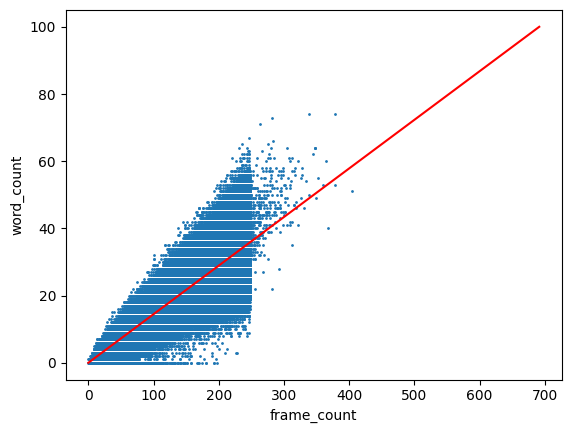

In [22]:
plot_approx("frame_count")

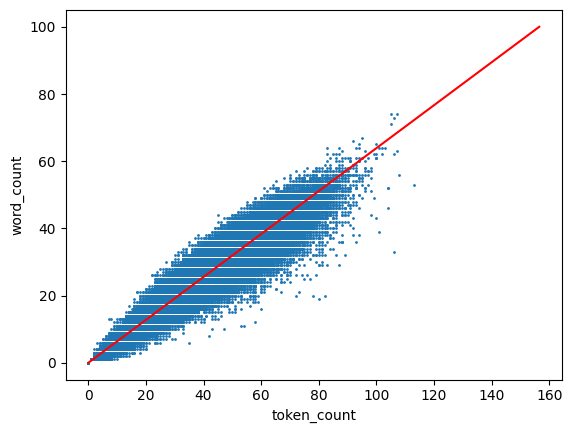

In [23]:
plot_approx("token_count")

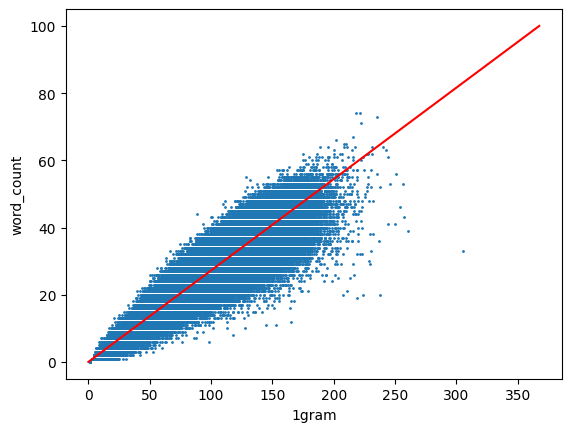

In [24]:
plot_approx("1gram")

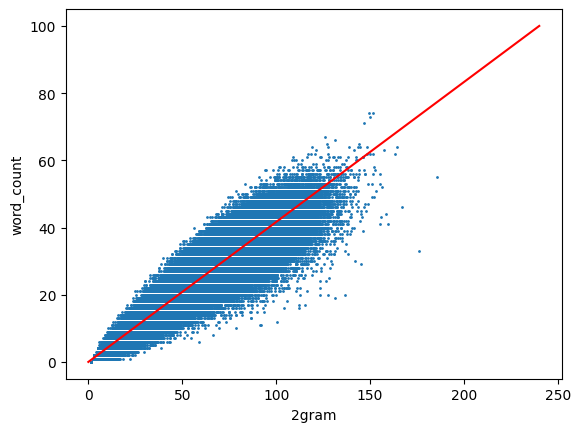

In [25]:
plot_approx("2gram")

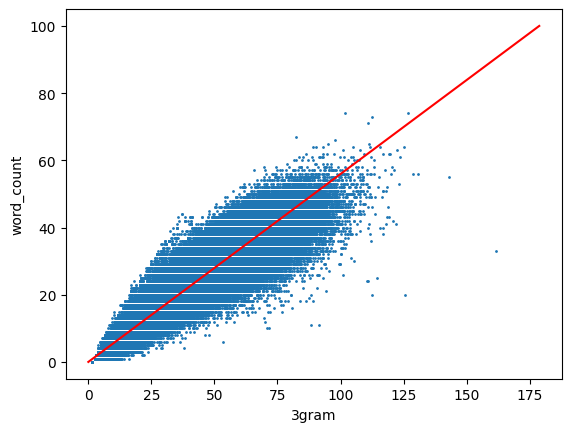

In [26]:
plot_approx("3gram")

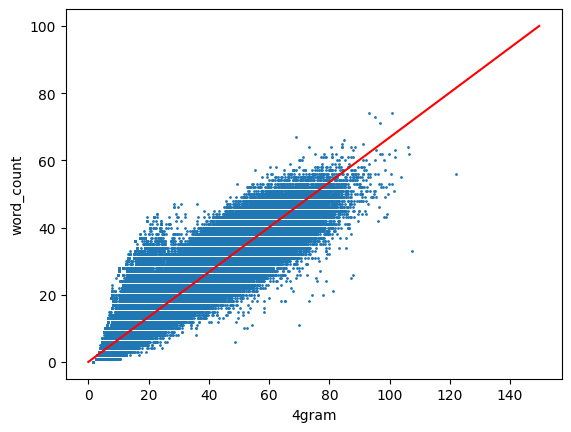

In [27]:
plot_approx("4gram")

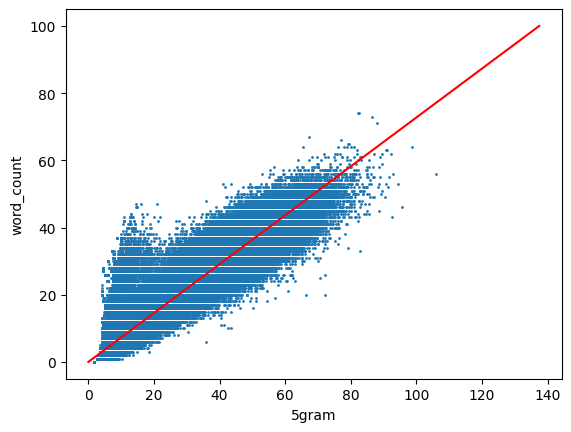

In [28]:
plot_approx("5gram")